In [56]:
import pandas as pd
import seaborn as sns

In [27]:
df = pd.read_csv('scores_data.csv')
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


## Cleaning 

### Missing Values

In [28]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

### check info

In [29]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


### Checking columns 

In [30]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [31]:
df.columns = df.columns.str.replace(" ","")
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

### Data type

In [32]:
df.dtypes

Batch      object
User_ID    object
Score      object
dtype: object

In [33]:
df['Score'] = df['Score'].apply(lambda x : float(x.split('/')[0].strip()))


In [35]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6.0
1,AI_ELITE_7,uid_148,6.0
2,AI_ELITE_7,uid_147,7.0
3,AI_ELITE_7,uid_146,7.0
4,AI_ELITE_7,uid_145,4.0


In [36]:
df.dtypes

Batch       object
User_ID     object
Score      float64
dtype: object

### Apply statistics 

In [39]:
df.describe()

,Score
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [40]:
df['Score'].mean()

4.382550335570469

In [41]:
df['Score'].median()

4.0

In [43]:
df['Score'].max()

7.0

In [44]:
df['Score'].min()

0.0

### Finding outliers 

In [45]:
df['Score'].quantile(0.25)

3.0

In [46]:
df['Score'].quantile(0.75)

5.0

- Its seems there is  as such no  outlier

### Visualization

<AxesSubplot:>

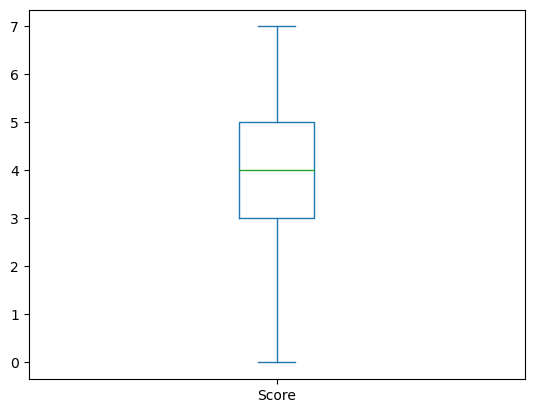

In [47]:
df['Score'].plot(kind="box")

<AxesSubplot:xlabel='Batch', ylabel='Score'>

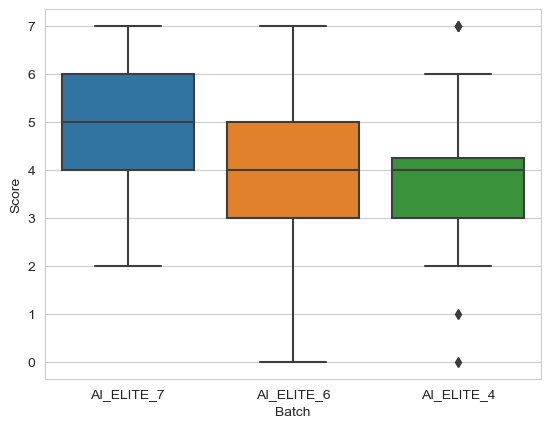

In [58]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Batch', y = 'Score', data = df)

<AxesSubplot:xlabel='Batch', ylabel='Score'>

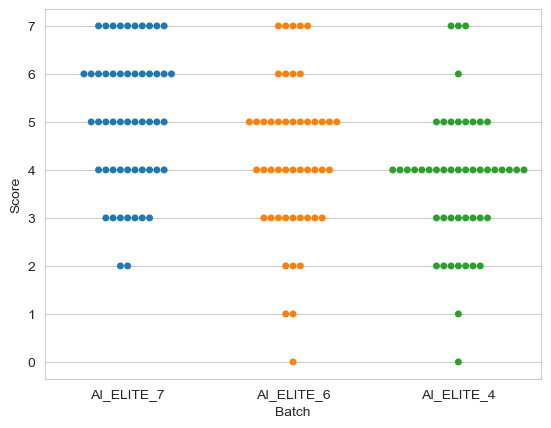

In [59]:
sns.set_style("whitegrid")

sns.swarmplot(x = 'Batch', y = 'Score', data = df)


<AxesSubplot:xlabel='Batch', ylabel='Score'>

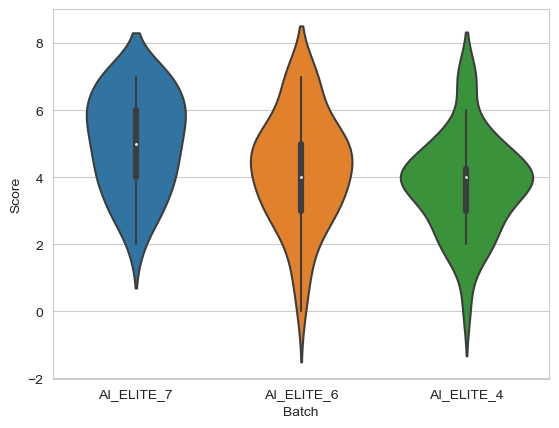

In [60]:
import seaborn as sns

sns.set_style("whitegrid")

sns.violinplot(x = 'Batch', y = 'Score', data = df)


<AxesSubplot:xlabel='Batch', ylabel='Score'>

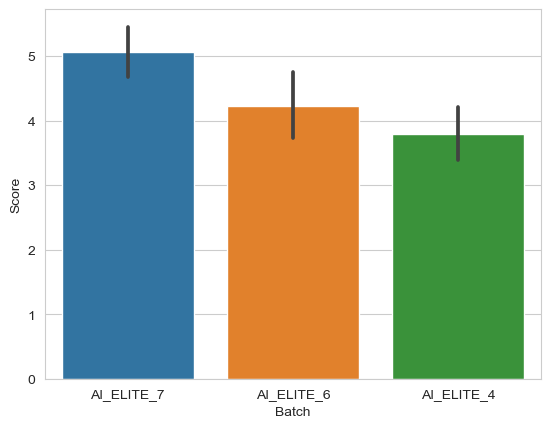

In [61]:
sns.barplot(x='Batch',y= 'Score',data = df)

<AxesSubplot:xlabel='Batch', ylabel='Batch'>

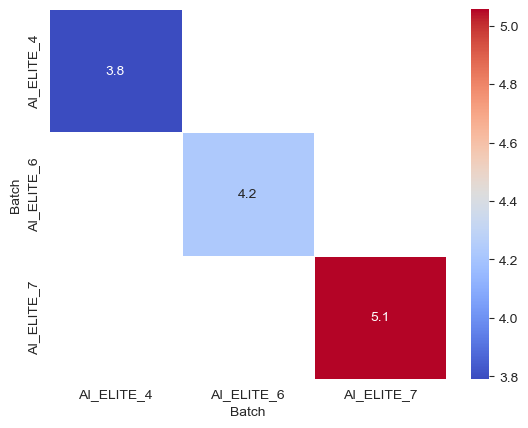

In [75]:
pivot_table = df.pivot_table(index='Batch', columns='Batch', values='Score')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)


<AxesSubplot:xlabel='Batch', ylabel='Score'>

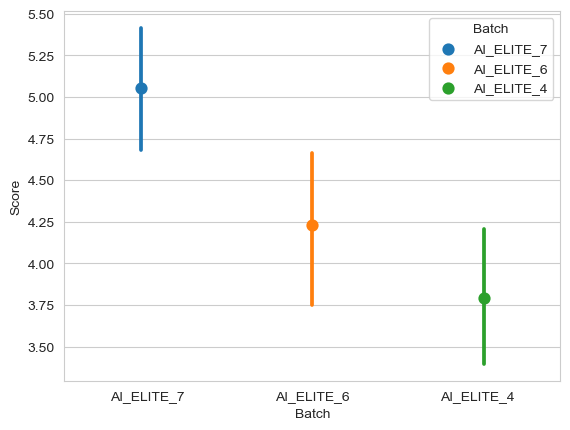

In [82]:
sns.pointplot(x='Batch',y = 'Score',dodge=True,hue='Batch' ,data = df)
